# Curso de Capacitación en Machine Learning para la Industria (ML CETAM) - Sesión 5 (Tarea)

<img src='http://ia.inf.pucp.edu.pe/static/images/logo.svg' width=300px>
<img src='https://dci.pucp.edu.pe/wp-content/uploads/2014/02/logo-color-pucp1.gif' width=200px>


PhD. Edwin Villanueva, PhD. Soledad Espezua, BSc. Daniel Saromo

<font color='#008B72'> Modelos de regresión: Predicción del esfuerzo de compresión de muestras de concreto </font>

Fuente del dataset: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength


<img src='https://i2.wp.com/civilblog.org/wp-content/uploads/2014/04/Compressive-Strength-Test-on-Concrete.jpg' width=180px>

En ingeniería civil, se estudia el esfuerzo de compresión del concreto que forma la estructura de los edificios. Este valor está relacionado con la resistencia mecánica del concreto y, por consiguiente, la capacidad del edificio de resistir sismos o el paso del tiempo. El valor del esfuerzo de compresión (en megapascales: MPa) de probetas hechas de concreto es determinado en un laboratorio, usando una máquina de ensayos. Sin embargo, hacer dichos experimentos tiene un costo elevado en términos de tiempo y dinero. El dataset que usaremos tiene información de distintos componentes utilizados durante la fabricación del concreto, por lo que sus valores son más fáciles de obtener.

[Video](https://youtu.be/dtvm7YNsSU0?t=35)

**Información de los atributos:**

Se indican el nombre del atributo, su tipo, la unidad de medida y una pequeña descripción. El esfuerzo de compresión de la probeta de concreto es el valor a predecir (regresión).

```
Name -- Data Type -- Measurement -- Description
----------------------------------------------------------------
Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable
```

## Solución desde el punto de vista de ML

De acuerdo al caso planteado, el objetivo del proyecto es poder realizar una estimación del módulo de compresión del concreto, usando información de la cantidad de componentes usados durante su fabricación.

Completar con su código los campos indicados y subir su notebook solucionado a la plataforma PAIDEIA.

Es responsabilidad del alumno verificar que el archivo que subió es el correcto.

El formato del nombre del archivo es: `Desafio5_APELLIDOPATERNO_NOMBRE.ipynb`. Subir solo su notebook resuelto, y **no el dataset**. Respetar los lineamientos de la entrega de archivo influirá en su calificación. La fecha límite de entrega del presente desafío se encuentra en PAIDEIA.

A modo de práctica y de afianzar los conocimientos de las sesiones anteriores, se pide lo siguiente:

0. Hacer el preprocesamiento necesario para ejecutar PCA (ya está completado).
1. Plotear la matriz de correlación de los atributos del dataset.
2. Realizar un análisis PCA con `n=2`.
3. Realizar un análisis PCA con `n=3`.
4. Evaluar el dataset mediante validación cruzada usando todos los atributos (columnas).
5. Evaluar el dataset mediante validación cruzada usando el modelo de PCA con `n=3`.

## Importamos los datos

In [ ]:
#libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Ahora, vamos a leer el dataset.

In [ ]:
# Read the dataset

dataset = pd.read_csv('dataset_concreto.csv', names=['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
                              'coarse_aggregate','fine_aggregate', 'age', 'compressive_strength'],
                      sep=',',#siempre revisar!
                      encoding='utf-8',
                      na_values=' ')

In [ ]:
dataset.columns.values.tolist()

['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'coarse_aggregate',
 'fine_aggregate',
 'age',
 'compressive_strength']

Primero, hacemos una exploración preliminar de los datos. ¿Cuál sería la variable objetivo (target)?

In [ ]:
dataset.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
count,1031,1031,1031,1031,1031,1031,1031,1031,1031
unique,281,188,164,206,156,285,305,15,939
top,425,0,0,192,0,932,755.8,28,33.39821744
freq,20,466,566,118,379,57,30,425,5


In [ ]:
targets = dataset.compressive_strength[1:] #labels en un numpy array
targets = np.reshape(targets.values,(targets.shape[0],1))
targets.shape

(1030, 1)

In [ ]:
feature_names = dataset.drop('compressive_strength', axis=1).columns #vemos los nombres de los atributos
feature_names

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age'],
      dtype='object')

In [ ]:
 #seleccionamos todas las filas, pero solamente las columnas cuyas etiquetas estén en la variable features
x = dataset.loc[1:, feature_names].values

#la siguiente fila es un auto-verificador para que vean si realizaron correctamente la extracción
assert x.shape == (1030, 8), "La extracción de los datos para aplicar StandardScaler no está bien ejecutada"

Revisamos si es que hay valores faltantes (null), para determinar si se requiere hacer una imputación o no.

In [ ]:
dataset.isna().sum(axis=0)

cement                  0
blast_furnace_slag      0
fly_ash                 0
water                   0
superplasticizer        0
coarse_aggregate        0
fine_aggregate          0
age                     0
compressive_strength    0
dtype: int64

Se observa que no se tienen datos faltantes. 

## 1) Matriz de correlación

In [ ]:
#inserte su código aquí. muestre las correlaciones de las variables antes de hacer el preprocesamiento

## 0) Preprocesamiento para PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [ ]:
np.mean(x),np.std(x)

(5.4756630729085393e-17, 1.0)

## 2) Principal Component Analysis (PCA) 2D

Por comodidad, cambiemos las etiquetas de las columnas a una forma más genérica:

In [ ]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
feat_cols

['feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6',
 'feature7']

In [ ]:
normalised_dataset = pd.DataFrame(x,columns=feat_cols)

In [ ]:
normalised_dataset.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7
1025,-0.045623,0.488241,0.564569,-0.092122,0.451695,-1.323003,-0.065874,-0.279733
1026,0.392837,-0.856886,0.960095,0.676201,0.702927,-1.994679,0.496916,-0.279733
1027,-1.270057,0.759585,0.850661,0.521599,-0.017270,-1.036061,0.080127,-0.279733
1028,-1.168580,1.308072,-0.847132,-0.279518,0.853666,0.214646,0.191188,-0.279733
1029,-0.194010,0.308504,0.376967,0.891706,0.401449,-1.395060,-0.150729,-0.279733


Ejecutamos un análisis de componentes principales:

In [ ]:
from sklearn.decomposition import PCA
pca_dataset = ...
principalComponents_dataset = ...

Vamos a crear un nuevo dataframe con los componentes principales:

In [ ]:
principal_Df = pd.DataFrame(data = principalComponents_dataset
             , columns = ['componente principal 1', 'componente principal 2'])

principal_Df.tail()

Computamos el ratio de varianza explicada (`explained_variance_ratio`). Nos indica la cantidad de información (o varianza) que posee cada componente principal luego de proyectar los datos en un sub-espacio de una dimensión menor.

In [ ]:
print('explained_variance_ratio de cada componente principal: {}'.format(pca_dataset.explained_variance_ratio_))

Se observa que el primer componente principal tiene el ...% de la información, y el segundo solamente el ...%. Al proyectar en un espacio de dimensión 2, se ha perdido aproximadamente un ...% de información.

## Interpretación gráfica del PCA 2D

In [ ]:
equis1 = principal_Df['componente principal 1'].values
equis2 = principal_Df['componente principal 2'].values

In [ ]:
import seaborn as sns
cmap = sns.color_palette("viridis", as_cmap=True)

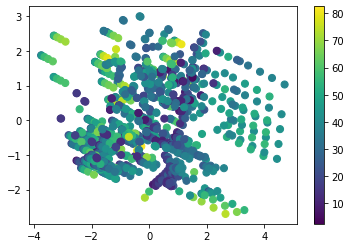

In [ ]:
f, ax = plt.subplots()
points = ax.scatter(equis1, equis2, c=targets,s=50, cmap=cmap)
f.colorbar(points)

## 3) Principal Component Analysis (PCA) 3D

In [ ]:
normalised_dataset = pd.DataFrame(x,columns=feat_cols)

In [ ]:
normalised_dataset.tail()

Ejecutamos un análisis de componentes principales:

In [ ]:
from sklearn.decomposition import PCA
...
...

Vamos a crear un nuevo dataframe con los componentes principales:

In [ ]:
principal_Df_3D = ...

principal_Df_3D.tail()

Computamos el ratio de varianza explicada (`explained_variance_ratio`). Nos indica la cantidad de información (o varianza) que posee cada componente principal luego de proyectar los datos en un sub-espacio de una dimensión menor.

In [ ]:
print('explained_variance_ratio de cada componente principal: {}'.format(pca_dataset_3D.explained_variance_ratio_))

Se observa que el primer componente principal tiene el ...% de la información, el segundo solamente el ...%, y el tercero ...%. Al proyectar en un espacio de dimensión 3, se ha perdido aproximadamente un 3...% de información.

## Interpretación gráfica del PCA 3D

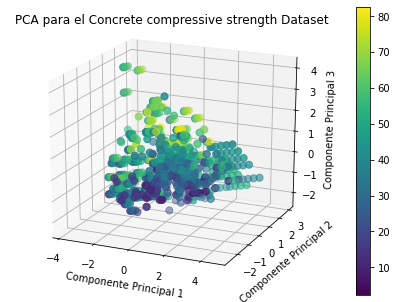

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

plt.clf()

elev = +20
azim = -66


ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title("PCA para el Concrete compressive strength Dataset")

points = ax.scatter(principal_Df_3D['componente principal 1'].values ,
           principal_Df_3D['componente principal 2'].values ,
           principal_Df_3D['componente principal 3'].values , c = targets, s = 50, cmap = cmap)

fig.colorbar(points)

## 4) Comparando modelos de predicción

Evaluar el dataset usando crosvalidación para los siguientes algoritmos de clasificación: `LinearReg()`, `Ridge()`, `Lasso()`,`ElasticNet()`, `KNN()`, `RegTrees()`, y `SVR()`. Hacer una crossvalidación con 8 folds y `random_state=seed=17` . Usar [`r2`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) como [métrica de scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).


Debe mostrar un resultado como este (con la media y la desviación estándar de la precisión):

```
LinearReg: -22.006008541988745 (12.188886010681149)
Ridge: -21.988408595885396 (12.189610389336641)
Lasso: -27.205895658130324 (12.124418229519783)
ElasticNet: -28.30115970360337 (13.609109541638535)
KNN: -21.45686665853659 (15.016217766474995)
RegTrees: -25.586471341463415 (16.998262117002646)
SVR: -29.57043293858262 (18.05296397264449)
```
Luego, realizar las siguientes tareas:

1. Escoger el algoritmo que tenga el mejor score.
2. Luego, ajustar un modelo basado en el algoritmo seleccionado.
3. Después, evaluar dicho modelo entrenado en el conjunto de validación.
4. Finalmente, plotear los valores reales Vs los predichos en el conjunto de validacion.


## 5) Comparando modelos de predicción con los 3 componentes principales

Realizar el mismo análisis anterior, pero con los 3 componentes principales del dataset.